In [52]:

#importing the required libraries

# import require packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv("data/Student.csv")

In [54]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
#prepare the x and y values that is input and output values

X=df.drop(columns=["math score"],axis=1)

y=df["math score"]

In [56]:
X.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [57]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [58]:
print(df["gender"].unique())
print(df["race/ethnicity"].unique())
print(df["parental level of education"].unique())
print(df["lunch"].unique())
print(df["test preparation course"].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [59]:
#create column transformer with 3 types of transformers
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [60]:
X=preprocessor.fit_transform(X)

In [61]:
X.shape

(1000, 19)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [63]:
#create a evalute function to give all metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)   # use a different variable name
    return rmse, mae, r2


In [64]:
#models which are used for training
models = {
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor()
}


In [65]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate correctly (true vs pred)
    model_train_rmse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_rmse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for train data")
    print("rmse:", model_train_rmse)
    print("mae:", model_train_mae)
    print("r2_score:", model_train_r2)
    print("-" * 15)

    print("Model performance for test data")
    print("rmse:", model_test_rmse)
    print("mae:", model_test_mae)
    print("r2_score:", model_test_r2)
    print("-" * 15)

    r2_list.append(model_test_r2)


KNeighborsRegressor
Model performance for train data
rmse: 5.709062970400659
mae: 4.5175
r2_score: 0.8554279731066252
---------------
Model performance for test data
rmse: 7.258333141982393
mae: 5.6370000000000005
r2_score: 0.7834973847119895
---------------
DecisionTreeRegressor
Model performance for train data
rmse: 0.2795084971874737
mae: 0.01875
r2_score: 0.9996534669718089
---------------
Model performance for test data
rmse: 8.010305861825753
mae: 6.235
r2_score: 0.7363137096323473
---------------
RandomForestRegressor
Model performance for train data
rmse: 2.3059544616343217
mae: 1.8273425595238095
r2_score: 0.9764139042978489
---------------
Model performance for test data
rmse: 5.981056826252173
mae: 4.602767261904762
r2_score: 0.8529905647490995
---------------
AdaBoostRegressor
Model performance for train data
rmse: 5.777526678954503
mae: 4.751175895941399
r2_score: 0.8519397349355015
---------------
Model performance for test data
rmse: 5.990194248196012
mae: 4.683244607893

In [66]:
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=["model_name", "R2_score"]).sort_values(by="R2_score", ascending=False)


,model_name,R2_score
6,Ridge,0.880593
5,LinearRegression,0.879345
2,RandomForestRegressor,0.852991
3,AdaBoostRegressor,0.852541
8,CatBoostRegressor,0.851632
9,XGBRegressor,0.827797
7,Lasso,0.825320
0,KNeighborsRegressor,0.783497
1,DecisionTreeRegressor,0.736314
4,SVR,0.728600


In [67]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of the model is:",score)

accuracy of the model is: 87.9345098417985


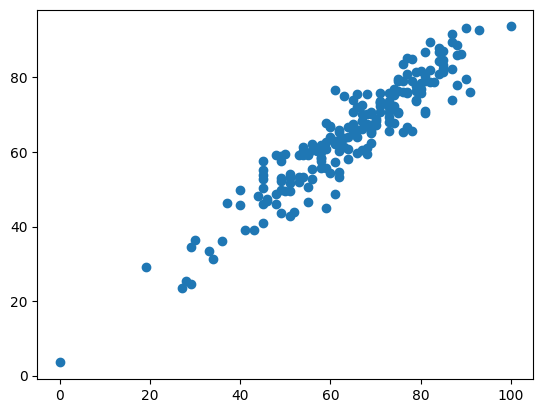

In [68]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math score'>

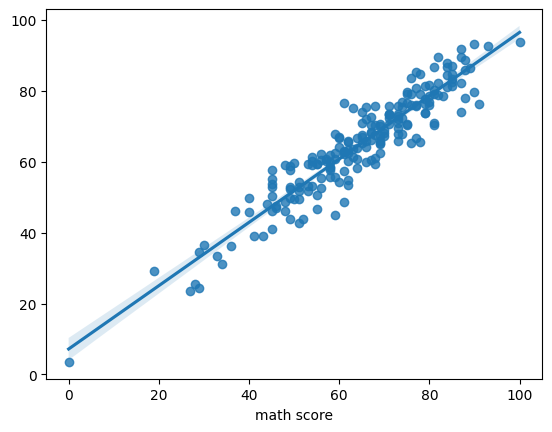

In [69]:
sns.regplot(x=y_test,y=y_pred)

In [70]:
pred_df=pd.DataFrame({"actual_value":y_test,"predicted_value":y_pred,"diff_value":y_test-y_pred})

In [71]:
pred_df

,actual_value,predicted_value,diff_value
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
